In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

file_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/TNG50_fitting_results/group_1_combined_results.txt'

In [29]:
data = Table.read(file_path, format='ascii.fixed_width',delimiter='|').to_pandas()

data.head(100)

,Sightline,Species,EW(mA),dEW(mA),N,dN,b,db,v,dv,l,dl,UpLim,Sat,Chisq
0,0,OVI1031,28.428499,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
1,1,OVI1031,257.460817,NaN,14.433298,0.182082,72.584541,25.325647,-552.746542,12.275492,1030.009398,0.084507,False,False,0.939115
2,2,OVI1031,22.623588,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
3,3,OVI1031,-8.970804,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
4,4,OVI1031,180.910659,NaN,14.313962,0.186973,38.081191,14.608108,-202.360075,6.143324,1031.215459,0.042292,False,True,0.716090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84,OVI1031,-19.660478,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
96,85,OVI1031,8.414526,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
97,86,OVI1031,34.600248,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN
98,87,OVI1031,26.564543,13.328229,13.026714,NaN,NaN,NaN,0.000000,50.000000,NaN,NaN,True,False,NaN


In [30]:
# remove completely duplicated rows
data = data.drop_duplicates()
print(data.shape)

data.groupby('Sightline')['N'].transform(lambda x: np.log10(np.sum(10**x)))
data  = data.loc[data.groupby('Sightline')['N'].idxmax()]
# data = data.drop_duplicates(subset=['Sightline'])
print(data.shape)

(100837, 15)
(90000, 15)


In [31]:
# count rows with dN is not nan
detections = data[~np.isnan(data['dN'])]

print(detections.shape[0])



print(detections.columns)

detections.head(20)



12071
Index(['Sightline', 'Species', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v',
       'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq'],
      dtype='object')


,Sightline,Species,EW(mA),dEW(mA),N,dN,b,db,v,dv,l,dl,UpLim,Sat,Chisq
1,1,OVI1031,257.460817,NaN,14.433298,0.182082,72.584541,25.325647,-552.746542,12.275492,1030.009398,0.084507,False,False,0.939115
4,4,OVI1031,180.910659,NaN,14.313962,0.186973,38.081191,14.608108,-202.360075,6.143324,1031.215459,0.042292,False,True,0.716090
8,7,OVI1031,217.191091,NaN,14.462040,0.239546,35.055049,13.814339,-494.732073,6.389407,1030.209089,0.043986,False,True,0.736351
22,20,OVI1031,176.303318,NaN,14.241382,0.371522,71.158149,2.759818,-339.329166,19.509715,1030.743999,0.134308,False,True,0.853636
23,21,OVI1031,152.810083,NaN,14.205862,0.183203,42.008814,19.314659,-290.810179,7.001939,1030.911006,0.048203,False,False,0.601301
27,25,OVI1031,210.900372,NaN,14.395998,0.169353,41.509196,14.103902,-181.402030,5.802083,1031.287598,0.039943,False,True,0.705605
36,33,OVI1031,691.620011,NaN,15.420394,0.554027,62.577132,29.767277,-74.403974,13.888702,1031.655895,0.095612,False,True,0.797563
39,36,OVI1031,118.061618,NaN,14.066588,0.286712,92.563084,0.999998,-71.317112,30.146315,1031.666520,0.207533,False,False,0.960054
43,40,OVI1031,105.401145,NaN,13.995437,0.248437,44.172501,1.000002,-24.148656,10.946352,1031.828878,0.075357,False,False,0.760961
51,48,OVI1031,98.288023,NaN,13.994071,0.212880,30.291429,0.999992,-117.699949,6.245323,1031.506866,0.042994,False,False,0.786168


In [32]:
# now for a same sightline number sum the column density value N_tot = np.log10(np.sum(10**N)) and save evrything in a new dataframe

detections['N_tot'] = detections.groupby('Sightline')['N'].transform(lambda x: np.log10(np.sum(10**x)))


detections_unique = detections.loc[detections.groupby('Sightline')['N'].idxmax()]


print(detections_unique.shape)
detections_unique.head(20)

(12071, 16)


/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_50876/780618476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['N_tot'] = detections.groupby('Sightline')['N'].transform(lambda x: np.log10(np.sum(10**x)))


,Sightline,Species,EW(mA),dEW(mA),N,dN,b,db,v,dv,l,dl,UpLim,Sat,Chisq,N_tot
1,1,OVI1031,257.460817,NaN,14.433298,0.182082,72.584541,25.325647,-552.746542,12.275492,1030.009398,0.084507,False,False,0.939115,14.433298
4,4,OVI1031,180.910659,NaN,14.313962,0.186973,38.081191,14.608108,-202.360075,6.143324,1031.215459,0.042292,False,True,0.716090,14.313962
8,7,OVI1031,217.191091,NaN,14.462040,0.239546,35.055049,13.814339,-494.732073,6.389407,1030.209089,0.043986,False,True,0.736351,14.462040
22,20,OVI1031,176.303318,NaN,14.241382,0.371522,71.158149,2.759818,-339.329166,19.509715,1030.743999,0.134308,False,True,0.853636,14.241382
23,21,OVI1031,152.810083,NaN,14.205862,0.183203,42.008814,19.314659,-290.810179,7.001939,1030.911006,0.048203,False,False,0.601301,14.205862
27,25,OVI1031,210.900372,NaN,14.395998,0.169353,41.509196,14.103902,-181.402030,5.802083,1031.287598,0.039943,False,True,0.705605,14.395998
36,33,OVI1031,691.620011,NaN,15.420394,0.554027,62.577132,29.767277,-74.403974,13.888702,1031.655895,0.095612,False,True,0.797563,15.420394
39,36,OVI1031,118.061618,NaN,14.066588,0.286712,92.563084,0.999998,-71.317112,30.146315,1031.666520,0.207533,False,False,0.960054,14.066588
43,40,OVI1031,105.401145,NaN,13.995437,0.248437,44.172501,1.000002,-24.148656,10.946352,1031.828878,0.075357,False,False,0.760961,13.995437
51,48,OVI1031,98.288023,NaN,13.994071,0.212880,30.291429,0.999992,-117.699949,6.245323,1031.506866,0.042994,False,False,0.786168,13.994071


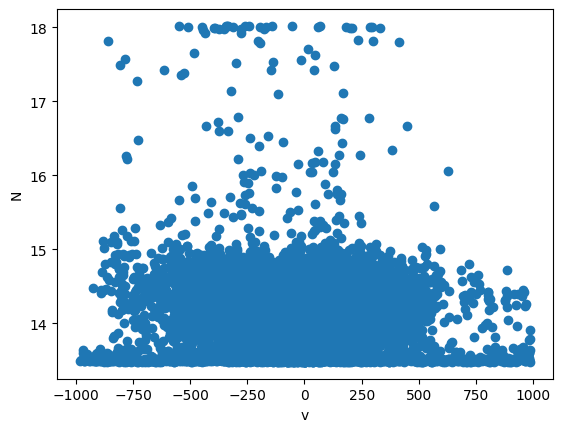

In [33]:
# plot the velocity dispersion i.e. 'v' column of the detection w.r.t N column
plt.scatter( detections_unique['v'],detections_unique['N'],)
plt.xlabel('v')
plt.ylabel('N')
plt.show()


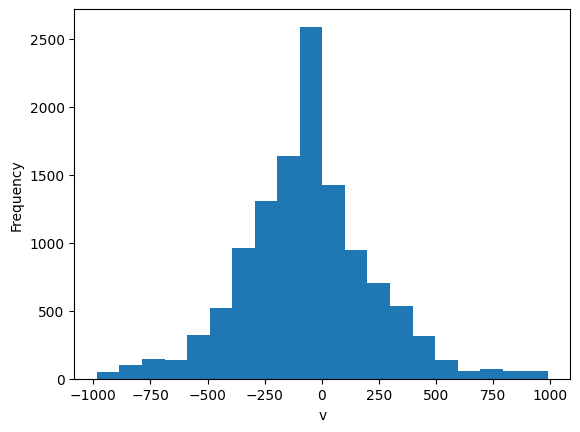

In [34]:
# plot histogram of V column
plt.hist(detections_unique['v'], bins=20)
plt.xlabel('v')
plt.ylabel('Frequency')
plt.show()


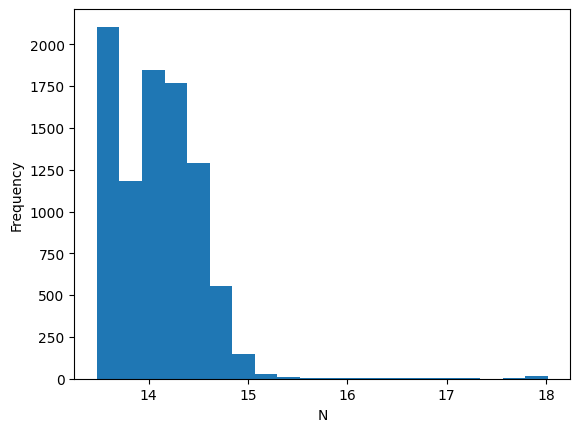

In [24]:
# plot the histogram of N column
plt.hist(detections_unique['N'], bins=20)
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()


Row with maximum N value:
Sightline          85379
Species          OVI1031
EW(mA)         740.66844
dEW(mA)              NaN
N              18.019937
dN              3.046955
b              34.858501
db             14.595463
v            -551.007904
dv              4.528604
l            1030.015382
dl              0.031176
UpLim              False
Sat                 True
Chisq           0.753231
N_tot          18.019937
Name: 95572, dtype: object
Top 5 rows with maximum N values:
       Sightline  Species      EW(mA)  dEW(mA)          N        dN  \
95572      85379  OVI1031  740.668440      NaN  18.019937  3.046955   
71794      64049  OVI1031  298.811443      NaN  18.017908  0.622031   
87412      78094  OVI1031  607.354025      NaN  18.017487  0.629164   
19381      17246  OVI1031  459.758512      NaN  18.016596  0.816745   
43159      38521  OVI1031  324.628008      NaN  18.016268  0.612525   

               b         db           v        dv            l        dl  \
95572  34.

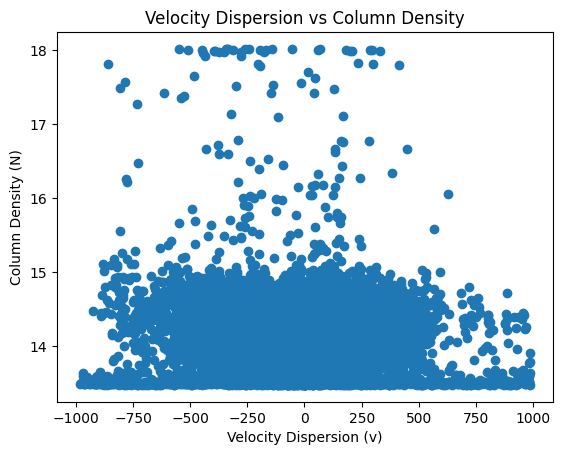

In [35]:

max_n_row = detections_unique.loc[detections_unique['N'].idxmax()]
print("Row with maximum N value:")
print(max_n_row)

# Step 2: Get the top 5 rows with the highest N values
top_5_rows = detections_unique.nlargest(5, 'N')
print("Top 5 rows with maximum N values:")
print(top_5_rows)

# Step 3: Plot velocity dispersion (v) vs. N
plt.scatter(detections_unique['v'], detections_unique['N'])
plt.xlabel('Velocity Dispersion (v)')
plt.ylabel('Column Density (N)')
plt.title('Velocity Dispersion vs Column Density')
plt.show()

In [36]:
# find the row with lowest N value
detections_unique.loc[detections_unique['N'].idxmin()]
print(detections_unique.loc[detections_unique['N'].idxmin()])   

Sightline         89679
Species         OVI1031
EW(mA)        27.671587
dEW(mA)             NaN
N             13.480006
dN                  1.0
b              5.987009
db                  1.0
v            251.864641
dv            145.26067
l            1032.77894
dl                  1.0
UpLim             False
Sat               False
Chisq          2.184032
N_tot         13.480006
Name: 100472, dtype: object


In [26]:
# statistics of the v column
print(detections_unique['v'].describe())
    

count    8987.000000
mean       75.960965
std       297.207354
min      -987.225792
25%       -94.334880
50%         6.314334
75%       285.153149
max       985.359329
Name: v, dtype: float64


In [12]:
group_ray_info_file = '/Users/wavefunction/Downloads/Grp_102_ray_info_new.txt'

ray_info = Table.read(group_ray_info_file, format='ascii.fixed_width',delimiter='|').to_pandas()

ray_info.head()

,Sightline,Start_x,Start_y,Start_z,End_x,End_y,End_z
0,1,5319.580761,21603.553019,31247.420044,5319.580761,21603.553019,33699.189331
1,2,5853.315162,21266.661789,31247.420044,5853.315162,21266.661789,33699.189331
2,3,5543.506376,21199.016568,31247.420044,5543.506376,21199.016568,33699.189331
3,4,5107.342617,21035.580775,31247.420044,5107.342617,21035.580775,33699.189331
4,5,5805.778966,21723.947348,31247.420044,5805.778966,21723.947348,33699.189331


In [319]:
# filter the data having a uniqye sightline number only (in case of more than 1 sightline number, pick with the highest N value)

data_unique_sightline = data.sort_values('N', ascending=False).drop_duplicates(subset='Sightline')

print(data_unique_sightline.shape)
data_unique_sightline.head()

(10000, 17)


,Sightline,Species,EW(mA),dEW(mA),N,dN,b,db,v,dv,l,dl,UpLim,Sat,Chisq,Trident_N,Z_mid
9784,8982,OVI1031,201.727607,NaN,14.456468,0.223014,30.078632,16.505624,-71.046111,6.164946,1031.667453,0.042441,False,True,0.151685,14.857879,0.137515
1411,1329,OVI1031,175.440425,NaN,14.317137,0.211849,33.915654,18.561239,65.608652,6.556299,1032.137831,0.045135,False,False,0.233116,14.494060,0.137515
4477,4119,OVI1031,155.803988,NaN,14.307208,0.146553,25.849394,9.094343,-78.659196,3.422528,1031.641248,0.023561,False,True,0.107557,14.503944,0.137515
564,548,OVI1031,125.117831,NaN,14.070318,0.460527,100.009894,131.270842,96.873090,42.949878,1032.245446,0.295675,False,False,0.151810,14.016990,0.137515
1434,1350,OVI1031,110.822704,NaN,14.041686,0.249424,34.452241,11.692344,-92.726537,8.864574,1031.592827,0.061025,False,False,0.097262,14.285509,0.137515


In [320]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

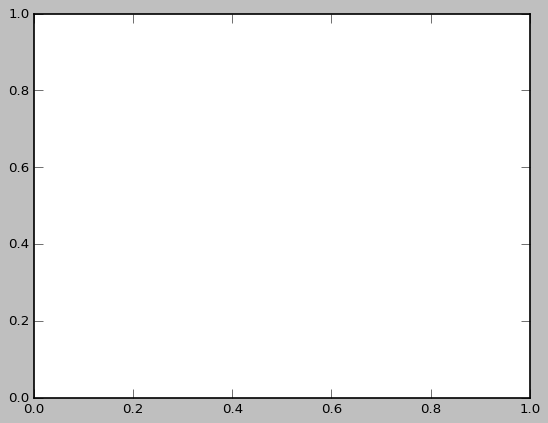

In [321]:
# Configurations
plt.style.use('classic')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['font.serif'] = 'Times New Roman'
plt.tick_params(axis='both', direction='in')

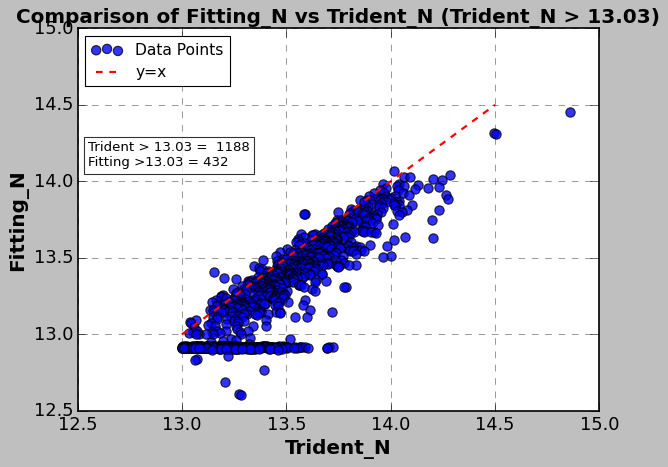

In [322]:
# Filter the data for Trident_N > 13
data_unique_N_gt_13 = data_unique_sightline[data_unique_sightline['Trident_N'] > 13]

plt.figure(figsize=(8, 6))
plt.scatter(data_unique_N_gt_13['Trident_N'], data_unique_N_gt_13['N'], 
            label='Data Points', alpha=0.8, edgecolor='black', s=70, c='blue')

plt.plot([13, 14.5], [13, 14.5], color='red', linestyle='--', linewidth=2, label='y=x')

text_str = "Trident > 13.03 =  1188\nFitting >13.03 = 432"
plt.text(12.55, 14.1, text_str, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Customize the plot
plt.xlabel('Trident_N', fontsize=18, fontweight='bold')
plt.ylabel('Fitting_N', fontsize=18, fontweight='bold')
plt.title('Comparison of Fitting_N vs Trident_N (Trident_N > 13.03)', fontsize=18, fontweight='bold')
plt.legend(fontsize=14, loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Optional: Save the figure as a high-resolution image
plt.savefig('comparison_N_vs_Trident_N_with_textbox.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [323]:
# pick the sightline that has maximum abs difference between N and Trident_N
outlier = data_unique_N_gt_13.loc[(data_unique_N_gt_13['N'] - data_unique_N_gt_13['Trident_N']).abs().idxmax()]

print(outlier)




Sightline         4596
Species        OVI1031
EW(mA)        6.975698
dEW(mA)      10.322591
N             12.91573
dN                 NaN
b                  NaN
db                 NaN
v                  0.0
dv                50.0
l                  NaN
dl                 NaN
UpLim             True
Sat              False
Chisq              NaN
Trident_N     13.72374
Z_mid         0.137515
Name: 5019, dtype: object


In [324]:
# Find the indices of the two largest absolute differences
second_max_idx = (data_unique_N_gt_13['N'] - data_unique_N_gt_13['Trident_N']).abs().nlargest(2).index[1]

# Use the index to access the outlier row
outlier = data_unique_N_gt_13.loc[second_max_idx]

print(outlier)

Sightline          239
Species        OVI1031
EW(mA)       14.779877
dEW(mA)      10.168246
N            12.909188
dN                 NaN
b                  NaN
db                 NaN
v                  0.0
dv                50.0
l                  NaN
dl                 NaN
UpLim             True
Sat              False
Chisq              NaN
Trident_N    13.694503
Z_mid         0.137515
Name: 249, dtype: object


In [325]:
# count the sightlines that have Trident_N > 1e13
count = data_unique_sightline[data_unique_sightline['Trident_N'] > 13].shape[0]
print(count)

count = detections_unique[detections_unique['N'] > 13].shape[0]
print(count)

1230
666


In [296]:
# count the rows in data_uniqe_sightline which are also in detections i,e. having dN not nan

count = data_unique_sightline['Sightline'].isin(detections['Sightline']).sum()

print(count)

741


In [297]:
ray_info.shape[0]


10000

In [298]:
# sort the data by sighline number
data_unique_sightline = data_unique_sightline.sort_values('Sightline')
data_unique_sightline.head()

,Sightline,Species,EW(mA),dEW(mA),N,dN,b,db,v,dv,l,dl,UpLim,Sat,Chisq,Trident_N,Z_mid
0,1,OVI1031,-0.455391,10.426784,12.920092,NaN,NaN,NaN,0.0,50.0,NaN,NaN,True,False,NaN,12.275773,0.137515
1,2,OVI1031,-1.848928,10.435237,12.920444,NaN,NaN,NaN,0.0,50.0,NaN,NaN,True,False,NaN,11.842758,0.137515
2,3,OVI1031,1.321280,10.385089,12.918352,NaN,NaN,NaN,0.0,50.0,NaN,NaN,True,False,NaN,11.929453,0.137515
3,4,OVI1031,2.695022,10.317260,12.915506,NaN,NaN,NaN,0.0,50.0,NaN,NaN,True,False,NaN,11.585383,0.137515
4,5,OVI1031,1.116919,10.434347,12.920407,NaN,NaN,NaN,0.0,50.0,NaN,NaN,True,False,NaN,11.679215,0.137515


In [299]:

centre_x = 5561.79052734375
centre_y = 21359.939453125
centre_z = 32473.3046875

R_vir = 612.9423217773438


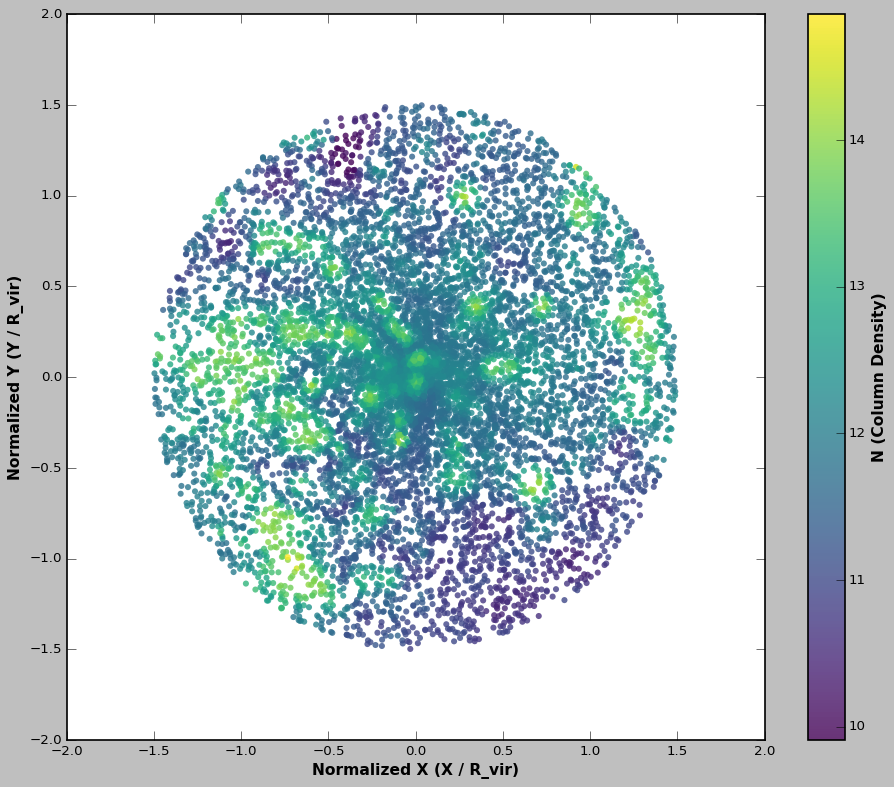

In [300]:
# Create a scatter plot with color as a function of 'N' column, normalized by R_vir
plt.figure(figsize=(12, 10))

# Scatter plot with normalized coordinates
scatter = plt.scatter(
    (ray_info['Start_x'] - centre_x) / R_vir, 
    (ray_info['Start_y'] - centre_y) / R_vir, 
    c=data_unique_sightline['Trident_N'], 
    cmap='viridis',
    edgecolor='none', 
    s=30, 
    alpha=0.8
)

# Set colorbar limits and label
# plt.clim(13, 14.5)
cbar = plt.colorbar(scatter)
cbar.set_label('N (Column Density)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Customize axes and add a title
plt.xlabel('Normalized X (X / R_vir)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Y (Y / R_vir)', fontsize=14, fontweight='bold')
# plt.title('Scatter Plot of Normalized Coordinates (Colored by N)', fontsize=16, fontweight='bold')

# Grid for better readability
# plt.grid(visible=True, linestyle='--', alpha=0.6)

# Ticks and layout adjustments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: Save the figure
# plt.savefig('scatter_normalized_coordinates.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

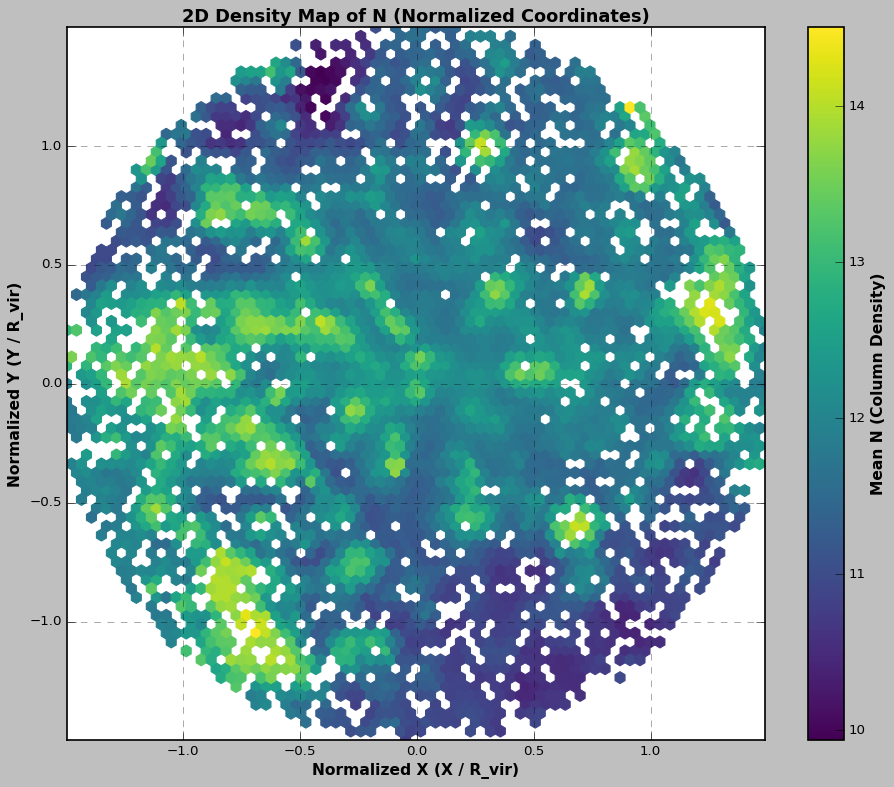

In [301]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D histogram of the data
x = (ray_info['Start_x'] - centre_x) / R_vir
y = (ray_info['Start_y'] - centre_y) / R_vir
weights = data_unique_sightline['Trident_N']

plt.figure(figsize=(12, 10))

# 2D histogram plot
hb = plt.hexbin(x, y, C=weights, gridsize=70, cmap='viridis', reduce_C_function=np.mean)

# Add colorbar
cbar = plt.colorbar(hb)
cbar.set_label('Mean N (Column Density)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Customize axes and add a title
plt.xlabel('Normalized X (X / R_vir)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Y (Y / R_vir)', fontsize=14, fontweight='bold')
plt.title('2D Density Map of N (Normalized Coordinates)', fontsize=16, fontweight='bold')

# Add grid for better readabprtoy#
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Adjust ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# # Optional: Save the figure
# plt.savefig('2D_density_map_N.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

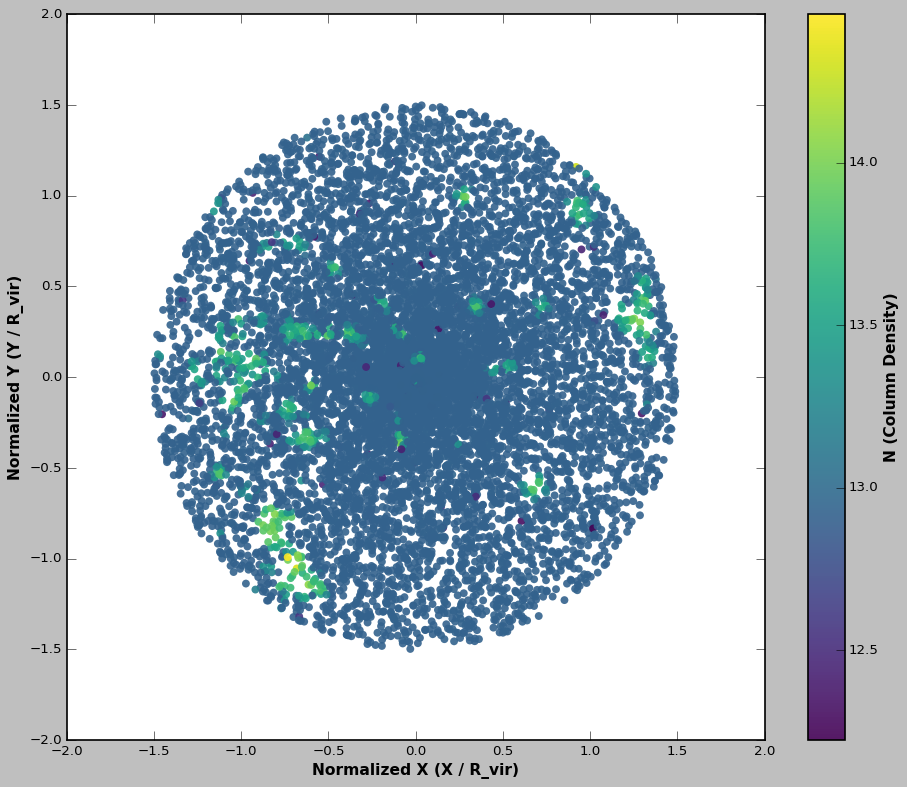

In [302]:
# Create a scatter plot with color as a function of 'N' column, normalized by R_vir
plt.figure(figsize=(12, 10))

# Scatter plot with normalized coordinates
scatter = plt.scatter(
    (ray_info['Start_x'] - centre_x) / R_vir, 
    (ray_info['Start_y'] - centre_y) / R_vir, 
    c=data_unique_sightline['N'], 
    cmap='viridis',
    edgecolor='none', 
    s=50, 
    alpha=0.9
)

# Set colorbar limits and label
# plt.clim(13, 14.5)
cbar = plt.colorbar(scatter)
cbar.set_label('N (Column Density)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Customize axes and add a title
plt.xlabel('Normalized X (X / R_vir)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Y (Y / R_vir)', fontsize=14, fontweight='bold')
# plt.title('Scatter Plot of Normalized Coordinates (Colored by N)', fontsize=16, fontweight='bold')

# Grid for better readability
# plt.grid(visible=True, linestyle='--', alpha=0.6)

# Ticks and layout adjustments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Optional: Save the figure
# plt.savefig('scatter_normalized_coordinates.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

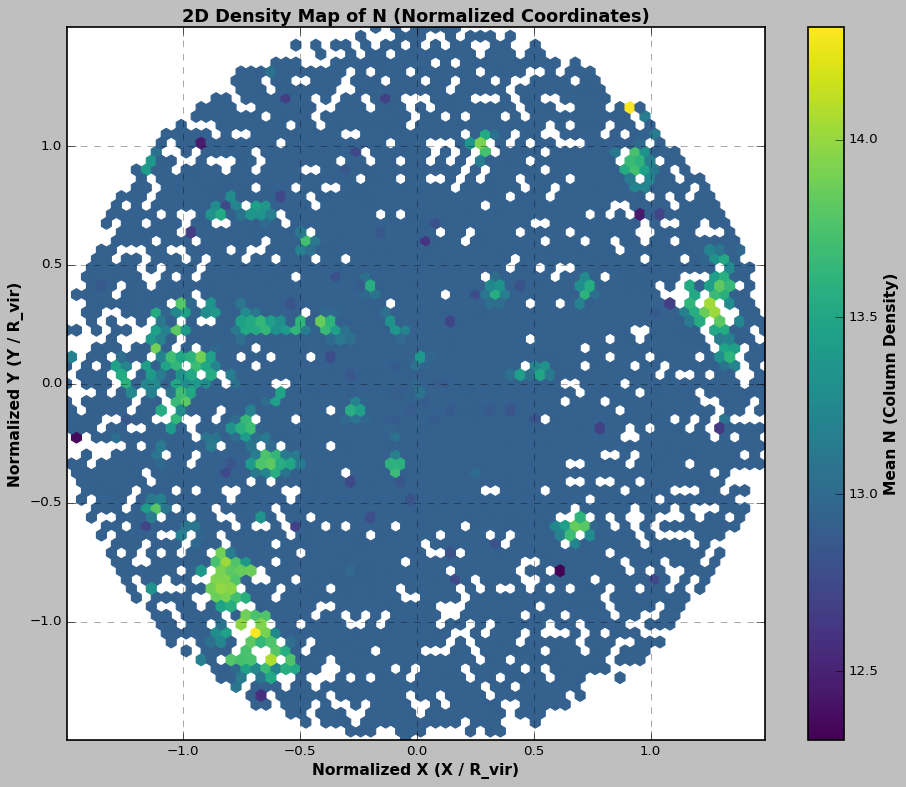

In [303]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D histogram of the data
x = (ray_info['Start_x'] - centre_x) / R_vir
y = (ray_info['Start_y'] - centre_y) / R_vir
weights = data_unique_sightline['N']

plt.figure(figsize=(12, 10))

# 2D histogram plot
hb = plt.hexbin(x, y, C=weights, gridsize=70, cmap='viridis', reduce_C_function=np.mean)

# Add colorbar
cbar = plt.colorbar(hb)
cbar.set_label('Mean N (Column Density)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Customize axes and add a title
plt.xlabel('Normalized X (X / R_vir)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Y (Y / R_vir)', fontsize=14, fontweight='bold')
plt.title('2D Density Map of N (Normalized Coordinates)', fontsize=16, fontweight='bold')


plt.grid(visible=True, linestyle='--', alpha=0.6)

# Adjust ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# # Optional: Save the figure
# plt.savefig('2D_density_map_N.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_71787/2605507358.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_71787/2605507358.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


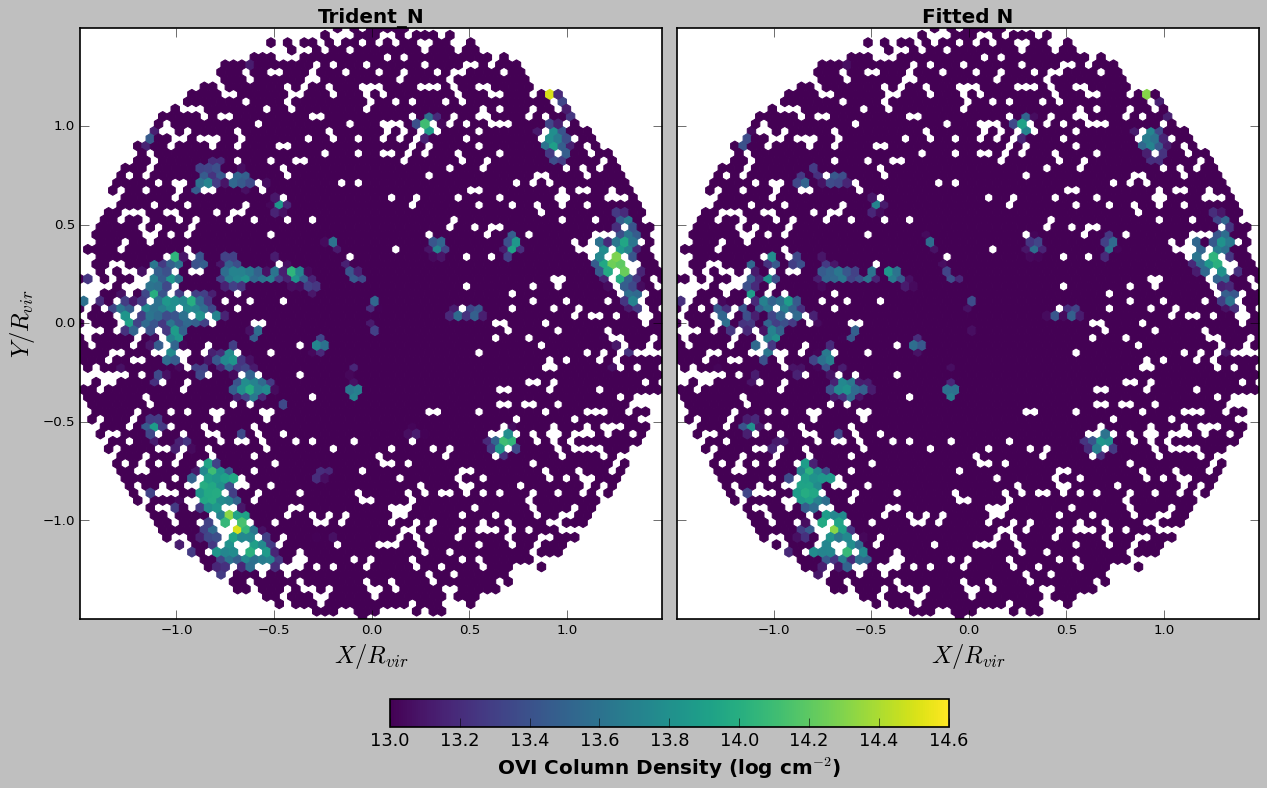

In [304]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `ray_info`, `centre_x`, `centre_y`, and `R_vir` are already defined
x = (ray_info['Start_x'] - centre_x) / R_vir
y = (ray_info['Start_y'] - centre_y) / R_vir

weights_trident = data_unique_sightline['Trident_N']
weights_n = data_unique_sightline['N']

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# Define color range for both plots
vmin, vmax = 13, 14.6

# Plot for Trident_N
hb1 = axes[0].hexbin(x, y, C=weights_trident, gridsize=70, cmap='viridis', reduce_C_function=np.mean, vmin=vmin, vmax=vmax)
axes[0].set_title('Trident_N', fontsize=18, fontweight='bold')
axes[0].set_xlabel('$X / R_{vir}$', fontsize=22)
axes[0].set_ylabel('$Y / R_{vir}$', fontsize=22)
#axes[0].grid(visible=True, linestyle='--', alpha=0.6)

# Plot for N
hb2 = axes[1].hexbin(x, y, C=weights_n, gridsize=70, cmap='viridis', reduce_C_function=np.mean, vmin=vmin, vmax=vmax)
axes[1].set_title('Fitted N', fontsize=18, fontweight='bold')
axes[1].set_xlabel('$X / R_{vir}$', fontsize=22)
# axes[1].grid(visible=True, linestyle='--', alpha=0.6)

# Adjust subplot layout to make space for the colorbar
fig.tight_layout(rect=[0, -0.25, 1, 1])  # Leave space at the bottom for the colorbar

# Add a common colorbar below the plots
cbar = fig.colorbar(hb1, ax=axes, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('OVI Column Density (log cm$^{-2}$)', fontsize=18, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Optional: Save the figure
plt.savefig('side_by_side_density_maps.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

| Grp_Index | GroupFirstSub | M_Crit200_log | R_Crit200 | GroupNsubs | Filtered_Nsubs | GroupPos_x(𝑐𝑘𝑝𝑐/ℎ) | GroupPos_y(𝑐𝑘𝑝𝑐/ℎ) | GroupPos_z(𝑐𝑘𝑝𝑐/ℎ) |
|         7 |        188893 |     13.366916 | 494.33572 |      10333 |              4 |          32072.227 |          30238.043 |          12095.834 |
|         8 |        199226 |      13.25535 | 453.76035 |       9337 |              7 |           9532.875 |           8869.659 |          2280.7864 |
|         9 |        208563 |     13.001824 |   373.523 |      11279 |              6 |           21565.54 |          19836.396 |          15311.446 |
|        10 |        219842 |     13.267114 |  457.8654 |      11527 |              7 |           95.99507 |           30197.44 |           19200.19 |
|        11 |        231369 |     13.250424 |   452.034 |       8474 |              3 |          3746.9238 |           18653.59 |          13167.583 |
|        12 |        239843 |    13.2155905 | 440.10724 |       8102 |              6 |          1132.7417 |           5820.808 |          26818.816 |
|        13 |        247945 |    13.1444435 |  416.7332 |       9360 |              6 |          21716.389 |           2239.914 |          14810.678 |
|        15 |        264620 |     13.038547 | 384.19003 |       7608 |              3 |           4834.154 |          22167.719 |          16398.639 |
|        17 |        277688 |     13.021956 | 379.33167 |       5824 |              4 |         14926.8125 |          4867.9204 |          33045.008 |
|        18 |        283512 |      13.03695 | 383.72205 |       5420 |              3 |          31092.031 |          33786.906 |          7304.1284 |
|        19 |        288932 |     13.015122 |  377.3538 |       5583 |              3 |          23765.447 |          25641.043 |          5197.4556 |
|        22 |        305020 |     12.995069 | 371.57556 |       4853 |              3 |          29995.889 |           19698.64 |           4958.383 |

In [309]:
M_array = np.array([13.366916,13.25535,13.001824, 13.267114,13.250424, 13.2155905, 13.1444435,13.038547, 13.021956,13.03695,13.01512,12.995069])
# convert this to m

M_array = 10**M_array/0.6774

print(np.log10(M_array))

[13.53607081 13.42450481 13.17097881 13.43626881 13.41957881 13.38474531
 13.31359831 13.20770181 13.19111081 13.20610481 13.18427481 13.16422381]
